<a href="https://colab.research.google.com/github/Mohican999370/Reverie/blob/master/transferlearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Transfer learning and fine tuning the algorithum
#pretrained weights from another model
#are unfrozen and tweaked during to better suit the own data


   # Model 0: a transfer learning model using the Keras Functional API
   # Model 1: a feature extraction transfer learning model on 1% of the data with data augmentation
   # Model 2: a feature extraction transfer learning model on 10% of the data with data augmentation
   # Model 3: a fine-tuned transfer learning model on 10% of the data
    #Model 4: a fine-tuned transfer learning model on 100% of the data


In [2]:
import datetime
print(f' the notebook runtime is at:{datetime.datetime.now()}')

 the notebook runtime is at:2024-03-20 18:06:29.798017


In [3]:
#check tf version
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
# obtain helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py




--2024-03-20 18:06:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-20 18:06:39 (79.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
### importing the nececssary functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir



In [6]:
# obatin the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-03-20 18:06:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   110MB/s    in 1.5s    

2024-03-20 18:06:42 (110 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
unzip_data('10_food_classes_10_percent.zip') # using helper function

In [8]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [9]:
### train and test data set
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [10]:
# 3/1/2024: the image_dataset_directory does rescale, imagedatagenerator cod eis not required.
#since the flow from directory has not rescaled the data., we will try using image data geenratorr on rescaling only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale =1/255)
test_gen = ImageDataGenerator(rescale =1/255)

In [11]:
train_gen

In [12]:
train_data_gen= train_gen.flow_from_directory(train_dir,
                                              batch_size =32,
                                              target_size = (224,224),
                                              class_mode = 'categorical')
test_data_gen= train_gen.flow_from_directory(test_dir,
                                              batch_size =32,
                                              target_size = (224,224),
                                              class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
train_data_gen

In [14]:
# since the imagedatageenrator has been slowwer for larger datatset.
#we will use the image_dataset_from_directory
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode ='categorical',
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32,
                                                                           label_mode ='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [15]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [16]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [17]:
# access the data using take method
for images, labels in train_data_10_percent.take(1):
  print(images, labels)


tf.Tensor(
[[[[ 92.57143     88.571434    79.31632   ]
   [102.06633    100.21429     75.87245   ]
   [123.59693    124.678566    90.60714   ]
   ...
   [ 97.          91.          93.        ]
   [ 96.07141     90.07141     92.07141   ]
   [ 96.668365    88.35715     91.127556  ]]

  [[ 75.97449     70.90306     50.326527  ]
   [ 80.561226    74.71429     60.612244  ]
   [ 87.285706    82.831635    71.31633   ]
   ...
   [ 97.67346     92.71428     96.5153    ]
   [ 97.86226     91.92857     95.78571   ]
   [ 97.26021     91.26021     95.117355  ]]

  [[ 75.02551     64.811226    55.362247  ]
   [ 80.36224     70.93367     64.65816   ]
   [ 79.38265     69.67347     66.14285   ]
   ...
   [ 99.50511     96.99999    100.59694   ]
   [100.9694      96.015305   100.42857   ]
   [101.          96.         100.42857   ]]

  ...

  [[ 14.423368    13.423368    11.423368  ]
   [ 20.52547     19.52547     17.52547   ]
   [ 23.188814    22.188814    20.188814  ]
   ...
   [ 13.785767    15.785

Model 0 : Functional API

In [18]:
#Model 0
### Building a transfer learning model using functional Api

# Series of steps

#1. Instansiate the model, by choosing the target model suxh as Efficent NetV280
# setting include_top parameter to false, so we can our own ouput model
#2 set the base model trainable to False to freeze all the weights in the pretrained model

In [19]:
#we can observe that the images are not naturalized, and the labels are dummy variables.

In [20]:
### create base model with tf.keras.applications

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
# include_top = false means we are creating our own outplut layer



base_model.trainable = False # so the trined info stays intact.

inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')


x= base_model(inputs)
print(f"Shape after base_model: {x.shape}")

#average pool the output of the base model
x= tf.keras.layers.GlobalAveragePooling2D(name = "global_average_polling")(x)
print(f'After global average polling 2d():{x.shape}')

outputs = tf.keras.layers.Dense(10, activation ='softmax', name = 'output_layer')(x)


model_0 = tf.keras.Model(inputs,outputs)


model_0.compile(loss = 'categorical_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs =5,
                                 steps_per_epoch =len(train_data_10_percent),
                                 validation_data = test_data_10_percent,

                                 validation_steps =len(test_data_10_percent),
                                 callbacks = [create_tensorboard_callback('transfer_learning',"10 _percent_feature")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After global average polling 2d():(None, 1280)
Saving TensorBoard log files to: transfer_learning/10 _percent_feature/20240320-180656
Epoch 1/5
24/24 [==============================] - 22s 454ms/step - loss: 1.8995 - accuracy: 0.4067 - val_loss: 1.3524 - val_accuracy: 0.7196
Epoch 2/5
24/24 [==============================] - 7s 305ms/step - loss: 1.1645 - accuracy: 0.7440 - val_loss: 0.9134 - val_accuracy: 0.8004
Epoch 3/5
24/24 [==============================] - 6s 260ms/step - loss: 0.8496 - accuracy: 0.8093 - val_loss: 0.7301 - val_accuracy: 0.8304
Epoch 4/5
24/24 [==============================] - 8s 305ms/step - loss: 0.6914 - accuracy: 0.8533 - val_loss: 0.6341 - val_accuracy: 0.8432
Epoch 5/5
24/24 [==============================] - 7s 300ms/step - loss: 0.5961 - accuracy: 0.8747 - val_loss: 0.5714 - val_accuracy: 0.8504


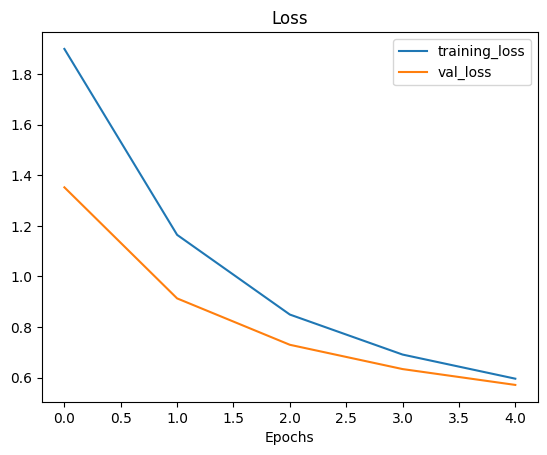

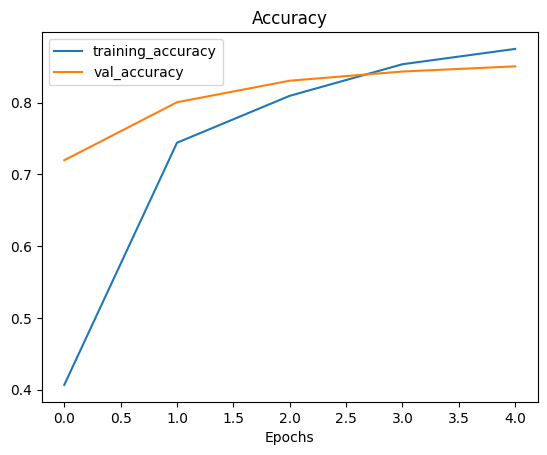

In [21]:
plot_loss_curves(history_10_percent)

In [22]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

1% data on food class.

In [23]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-03-20 18:07:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   257MB/s    in 0.6s    

2024-03-20 18:07:51 (257 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [24]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
#unzip_data("10_food_classes_1_percent.zip")


--2024-03-20 18:07:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   234MB/s    in 0.5s    

2024-03-20 18:07:52 (234 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [25]:
def unzip_data1( dir_name):
  import zipfile
  zipref = zipfile.ZipFile(dir_name)
  zipref.extractall()
  zipref.close()

unzip_data1('10_food_classes_1_percent.zip')

In [26]:
unzip_data1('10_food_classes_1_percent.zip')

In [27]:
train_dir = '10_food_classes_1_percent/train'
test_dir ='10_food_classes_1_percent/test'

# now, get the image in the format we work on from image_dataset_from_directory



In [28]:
import os
for dir_path,dir_name, file_name in os.walk('10_food_classes_1_percent'):
  print(f' there are {len(dir_name)} directories  with {len(file_name)} images, of dir length {dir_path}')

 there are 2 directories  with 0 images, of dir length 10_food_classes_1_percent
 there are 10 directories  with 0 images, of dir length 10_food_classes_1_percent/train
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/fried_rice
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/hamburger
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/grilled_salmon
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/chicken_wings
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/ice_cream
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/pizza
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/steak
 there are 0 directories  with 7 images, of dir length 10_food_classes_1_percent/train/chicken_curry
 there are 0 directories  with 7 images, of dir l

In [29]:
# train_dir
# preprocessing of the dataset
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
train_1_percent = image_dataset_from_directory(train_dir,

                                               batch_size =32,
                                               image_size = (224,224),
                                               label_mode = 'categorical',  # since it has multiplt output images of food
                                               seed = 42)

test_1_percent = image_dataset_from_directory(test_dir,
                                              batch_size =32,
                                              image_size = (224,224),
                                              label_mode = 'categorical',
                                              seed =42)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
# data_agumentation
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#from tensorflow.keras.layers import Sequential

augumentation = tf.keras.Sequential([
                        preprocessing.RandomRotation(0.2),
                        preprocessing.RandomFlip('horizontal'),
                        preprocessing.RandomZoom(0.2),
                        preprocessing.RandomHeight(0.2),
                      preprocessing.RandomWidth(0.2)
], name = 'augumentation') # layers.rescaling while using resnet50V2

In [31]:
train_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

(-0.5, 511.5, 305.5, -0.5)

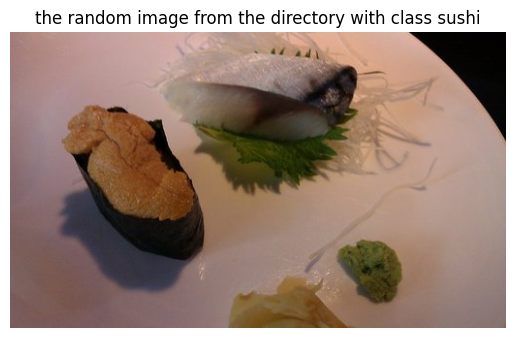

In [32]:
# random photo, and obtain it with the directory


import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

target_class = random.choice(train_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class

random_image = random.choice(os.listdir(target_dir))

random_path = target_dir + "/"+ random_image

# read the image
img = mpimg.imread(random_path)

plt.imshow(img)
plt.title(f"the random image from the directory with class {target_class}")
plt.axis(False)
# random_image





(384, 512, 3)
(1, 399, 605, 3)


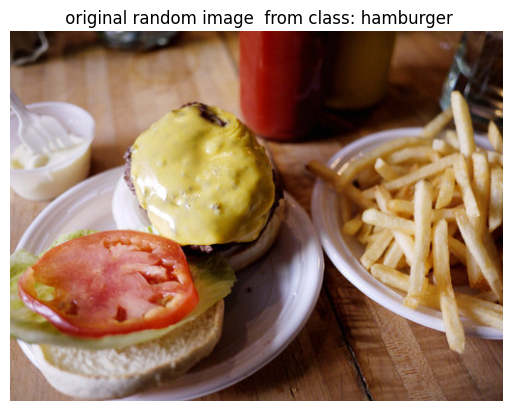

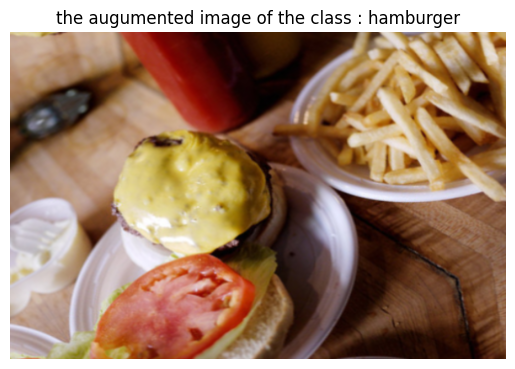

In [33]:
# obtaining random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

target_class = random.choice(train_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class

rand_image = random.choice(os.listdir(target_dir))

rand_image_path = target_dir  + "/" + rand_image

img = mpimg.imread(rand_image_path)
print(img.shape)
plt.imshow(img)
plt.title(f" original random image  from class: {target_class}")
plt.axis(False);
#augumenting the image
import tensorflow as tf

augumented_image = augumentation(tf.expand_dims(img,axis = 0))
print(augumented_image.shape)
plt.figure()
plt.imshow(tf.squeeze(augumented_image)/255)
plt.title(f"the augumented image of the class : {target_class}")
plt.axis(False);



In [34]:
inputs.shape
x.shape

TensorShape([None, 1280])

In [35]:
x =augumentation(inputs)

x.shape

TensorShape([None, None, None, 3])

In [36]:
#base_model2(x)

In [37]:
#train_1_percent
test_1_percent
outputs, inputs

(<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>,
 <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_layer')>)

In [38]:
base_model2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top =False)
base_model2.trainable = False  # make the input layer just as it was trained by efficient net, to get their best info.
input_shape = (224,224,3)
inputs = tf.keras.layers.Input(shape =(224,224,3), name = 'input_layer')

x= augumentation(inputs)
# adding augumentation in the function api layer rather then


x= base_model2(inputs, training =False)


x = tf.keras.layers.GlobalAveragePooling2D(name = "globalaveragepool")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layer")(x)

model2 = tf.keras.Model(inputs,outputs)

model2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_2 = model2.fit(train_1_percent,
                       epochs = 10,
                       steps_per_epoch = len(train_1_percent),
                       validation_data = test_1_percent,
                       validation_steps = int(0.25*len(test_1_percent)),
                       callbacks = [create_tensorboard_callback('transfer_learning',"1_percent_data")])

Saving TensorBoard log files to: transfer_learning/1_percent_data/20240320-180803
Epoch 1/10
3/3 [==============================] - 14s 4s/step - loss: 2.3080 - accuracy: 0.1286 - val_loss: 2.2024 - val_accuracy: 0.1826
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 2.0254 - accuracy: 0.3571 - val_loss: 2.0330 - val_accuracy: 0.3470
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.8077 - accuracy: 0.5286 - val_loss: 1.9059 - val_accuracy: 0.4457
Epoch 4/10
3/3 [==============================] - 2s 800ms/step - loss: 1.6193 - accuracy: 0.6571 - val_loss: 1.7847 - val_accuracy: 0.5115
Epoch 5/10
3/3 [==============================] - 2s 744ms/step - loss: 1.4444 - accuracy: 0.7000 - val_loss: 1.6927 - val_accuracy: 0.5493
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 1.2917 - accuracy: 0.8571 - val_loss: 1.5839 - val_accuracy: 0.6102
Epoch 7/10
3/3 [==============================] - 2s 837ms/step - loss: 1.1507 - accuracy

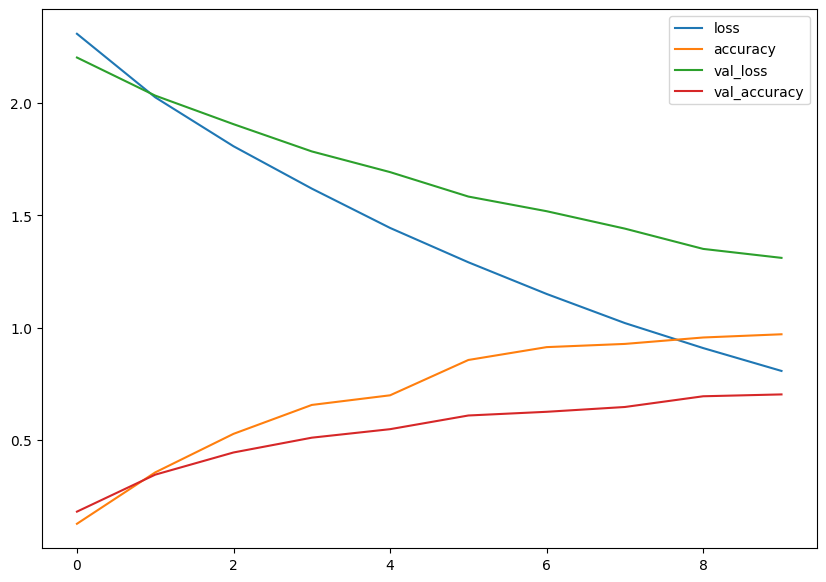

In [39]:
#test_data_gen.dtype, train.dtype
# plotting the curve of loss and accuracy
import pandas as pd
mod2 = pd.DataFrame(history_2.history).plot(figsize = (10,7))


In [40]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 globalaveragepool (GlobalA  (None, 1280)              0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


# working on the dataset with tuning using elastinet for 10% data and dataaugumentation

In [41]:
### creating a augumented layer in 10% test data
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2024-03-20 18:08:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   210MB/s    in 0.8s    

2024-03-20 18:08:47 (210 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [42]:
import os
walk_through_dir("10_food_classes_10_percent") # using built in helper function

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [43]:
train_data = '10_food_classes_10_percent/train'
test_data = '10_food_classes_10_percent/test'

In [44]:
# create the augumented layer

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

augumented_layer = keras.Sequential([
    layers.RandomFlip('vertical'),
    layers.RandomZoom(0.4),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.3)
],name = 'augumentation_layer')


In [45]:
# image prcossing the data image
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_10_data = image_dataset_from_directory(train_data,
                                             image_size = (224,224),
                                             label_mode ='categorical',
                                             batch_size = 32,
                                             seed = 42)
test_10_data = image_dataset_from_directory(test_data,
                                             image_size = (224,224),
                                             label_mode ='categorical',
                                             batch_size = 32,
                                             seed = 42)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [46]:
# after perfomring augumentation and image processing , we can sue the functional api to build the model
import tensorflow

base_model3 = tensorflow.keras.applications.efficientnet_v2.EfficientNetV2B1(include_top = False)
# using the same model here
base_model3.trainable = False
input_shape = (224,224,3)


inputs = layers.Input(shape = input_shape, name = 'input_layer')

x= augumented_layer(inputs) # adding the augumentation layer
x= base_model3(x)

x= tensorflow.keras.layers.GlobalAveragePooling2D(name = 'Golbal_average_pooling')(x)

outputs = tensorflow.keras.layers.Dense(10, activation = 'softmax') (x)

model3 = tensorflow.keras.Model(inputs, outputs)

model3.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics =['accuracy'])

history_3 = model3.fit(train_10_data,
                       epochs = 10,
                       steps_per_epoch = len(train_10_data),
                       validation_data = test_10_data,
                       validation_steps = int(0.25*(len(test_10_data))),
                       callbacks = [create_tensorboard_callback('10_percent', "feature_extraction")])

28456008/28456008 [==============================] - 0s 0us/step
Saving TensorBoard log files to: 10_percent/feature_extraction/20240320-180853
Epoch 1/10
24/24 [==============================] - 24s 566ms/step - loss: 2.0736 - accuracy: 0.2800 - val_loss: 1.5393 - val_accuracy: 0.6513
Epoch 2/10
24/24 [==============================] - 12s 484ms/step - loss: 1.5323 - accuracy: 0.5773 - val_loss: 1.1278 - val_accuracy: 0.7533
Epoch 3/10
24/24 [==============================] - 8s 308ms/step - loss: 1.2173 - accuracy: 0.6680 - val_loss: 0.8760 - val_accuracy: 0.8043
Epoch 4/10
24/24 [==============================] - 6s 246ms/step - loss: 1.0558 - accuracy: 0.7053 - val_loss: 0.7649 - val_accuracy: 0.8141
Epoch 5/10
24/24 [==============================] - 7s 291ms/step - loss: 0.9568 - accuracy: 0.7427 - val_loss: 0.6842 - val_accuracy: 0.8388
Epoch 6/10
24/24 [==============================] - 4s 163ms/step - loss: 0.8698 - accuracy: 0.7587 - val_loss: 0.6294 - val_accuracy: 0.8405
Ep

In [65]:
# creating a function to use the
def create_base_model(input_shape : tuple[int,int,int] = (224,224,3),
                      output_shape: int = 10,
                      learning_rate : float = 0.0001,
                      training: bool = False)-> tf.keras.Model:

# import the libraries
    import tensorflow as tf
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation
    from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.losses import categorical_crossentropy



    base_model =  EfficientNetV2B0(include_top = False)
    base_model.trainable = training

    # augumentation layer

    augumentation_1 = Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomZoom(0.4),
        layers.RandomHeight(0.3),
        layers.RandomRotation(0.3),
    ], name = "augumentation_layer")
    inputs = tensorflow.keras.Input(shape= input_shape, name = "input_layer")

    x= augumentation_1(inputs)
    x= base_model(x, training = False)

    x= tensorflow.keras.layers.GlobalAveragePooling2D()(x)

    outputs= tensorflow.keras.layers.Dense(units = output_shape, activation = 'softmax', name = "output_layer")(x)

    model = tensorflow.keras.Model(inputs,outputs)

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                  metrics= ['accuracy'])

    return model


In [66]:
model3= create_base_model()


In [72]:
def create_tensorboard_callback(dir_name,experiment_name):
    import datetime

    log_dir = dir_name + "/"+ experiment_name + "/" +datetime.datetime.now().strftime("%Y%M%D- %H%M%S")
    tensor_board_callback  = tensorflow.keras.callbacks.TensorBoard(log_dir= log_dir)

    print(f'saving tensordboard callback log files to {log_dir}')
    return tensor_board_callback



In [67]:
#### creating checkpoint, to be added in the model at callbacks

checkpoint_path = "ten_percent_model_checkpoint_weight/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weight_only= True,
                                                         save_best_only= True,
                                                         save_freq ='epoch',
                                                         verbose =1)

In [80]:
# we will use the above model into using checkpoi
# we will use the above model into using checkpoi
intial_epochs = 5

history_10_percent_data_aug = model3.fit(train_10_data,
                                         epochs = 5,
                                         validation_data = test_10_data,
                                         validation_steps = int(0.25*len(test_10_data)),
                                                                callbacks = [create_tensorboard_callback('train_10_percent_augumented',"augumented"),checkpoint_callback])

saving tensordboard callback log files to train_10_percent_augumented/augumented/20242603/20/24- 192621
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.3216 - accuracy: 0.1227
Epoch 1: val_loss improved from inf to 2.23816, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 53s 2s/step - loss: 2.3216 - accuracy: 0.1227 - val_loss: 2.2382 - val_accuracy: 0.1546
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 2.2309 - accuracy: 0.1493
Epoch 2: val_loss improved from 2.23816 to 2.14441, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 37s 2s/step - loss: 2.2309 - accuracy: 0.1493 - val_loss: 2.1444 - val_accuracy: 0.2105
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 2.1354 - accuracy: 0.2293
Epoch 3: val_loss improved from 2.14441 to 2.05713, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
24/

In [81]:
# evaluate the test result

result_2 = model3.evaluate(test_10_data)

79/79 [==============================] - 5s 58ms/step - loss: 1.8949 - accuracy: 0.4648


In [84]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
#plot_loss_curve(history_10_percent_data_aug)

--2024-03-20 19:42:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-03-20 19:42:57 (12.4 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



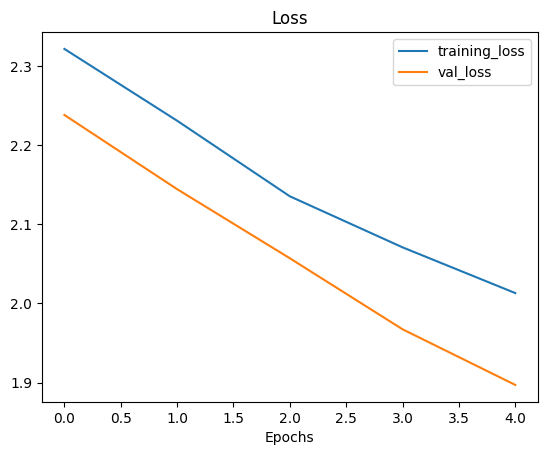

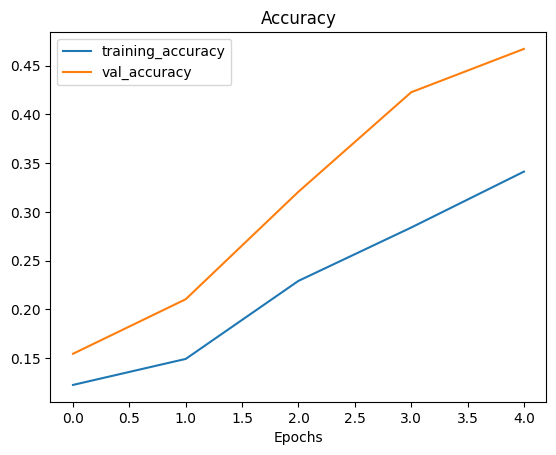

In [86]:
plot_loss_curves(history_10_percent_data_aug)

# Fine tuning